<a href="https://colab.research.google.com/github/alicejeverdeanu/DA382A_Project_VT24/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##In this lab, we have 5 questions, and each question is worth 0.5 points, for a total of 2.5 points. For each question, you must not only implement the code but also explain your observations

# 📊 Data, EDA, and Preprocessing

---

## 🔹 What is Data?
- **Data** is raw information, such as numbers, text, or images, that we collect for analysis.  
- When processed and organized, data becomes meaningful and can be used to make decisions or train machine learning models.  

---

## 🔹 Structured vs Unstructured Data
- **Structured data** → Data that is neatly organized, like in tables or Excel sheets.  
  *Examples: names, phone numbers, dates.*  
- **Unstructured data** → Data that is not organized in a clear way.  
  *Examples: pictures, videos, emails, text messages.*  

---

## 🔹 Types of Data

| **Type**                   | **Subtype**   | **Meaning**                                     | **Examples** |
|-----------------------------|---------------|-------------------------------------------------|--------------|
| **Numerical (Quantitative)** | **Discrete**  | Whole numbers you can count (no decimals).      | Number of students = 30, Number of cars = 12 |
|                             | **Continuous** | Numbers you can measure (can include decimals). | Height = 175.5 cm, Weight = 68.2 kg, Temperature = 36.7°C |
| **Categorical (Qualitative)** | **Binary**   | Only 2 possible values.                         | Yes/No, Male/Female, On/Off |
|                             | **Ordinal**   | Categories with a natural order/rank.           | Education = High school < Bachelor < Master < PhD |
|                             | **Nominal**   | Categories with no order, just labels.          | Colors = Red, Blue, Green; Countries = Sweden, Iran, Italy |

---

## 🔹 1. Exploratory Data Analysis (EDA)

**What you usually do in EDA:**
- Check the shape of the dataset (rows, columns).  
- Look at missing values.  
- See the basic statistics (mean, median, min, max).  
- Make plots (histograms, boxplots, scatterplots) to understand distributions and relationships.  
- Detect outliers or unusual data points.  

📊 **Example**: If you have a dataset of students’ scores, EDA helps you see:  
- Average score  
- Who scored the highest and lowest  
- Whether boys and girls performed differently  
- If there are missing exam results  

---

## 🔹 2. Preprocessing

 Preprocessing means **cleaning and preparing raw data** so it can be used for analysis or training models.  

**Common Steps in Preprocessing:**
- **Cleaning data**   
  - Handle missing values (fill them, drop them).  
  - Remove duplicates.  
  - Correct wrong or inconsistent values.  

- **Transforming data**
  - Convert text into numbers (e.g., Male = 0, Female = 1).  
  - Normalize/scale numerical values (e.g., make all features between 0 and 1).  

- **Reducing data**  
  - Drop irrelevant columns.  
  - Use feature selection or dimensionality reduction (like PCA).  

- **Splitting data**   
  - Divide into training set and test set.  

 **Example**: If you have house price data:  
- Remove rows where the price is missing.  
- Convert “Yes/No” for garage into 1/0.  
- Scale square meters so they’re comparable to number of rooms.  
- Split into training (80%) and test (20%).  

 In short: Preprocessing = making raw data **clean, consistent, and ready to use**.  



## **🔸 Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## **🔸 Hello Data**

### Load dataset

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/insurance.csv"
df = pd.read_csv(url)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
region,object
charges,float64


### Access to rows and columns

In [ ]:
df.iloc[0:3, 2:4]
df.iloc[[0, 1337]]
df.iloc[:, [0]]

,age
0,19.0
1,NaN
2,28.0
3,33.0
4,32.0
...,...
1333,50.0
1334,18.0
1335,NaN
1336,21.0


In [ ]:
df[['children', 'sex']]
df.children

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

### Make a codable dataset

In [ ]:
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


# **Question 1: Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of exploring a dataset to understand its structure, main characteristics, and patterns before applying any machine learning model.  
The goal is to **summarize the data, find relationships, and detect trends or anomalies**.  

In EDA, we often use:  
- **Statistical summaries** → `df.describe()`  
- **Correlation analysis** → `df.corr()`
- **Visualizations** such as:  
  - Histograms → show distributions of individual features  
  - Subplots → compare multiple features at once  
  - Pair plots → show relationships between features  

---

### **Student Task**

1. Perform EDA on the dataset using:  
   - `df.describe()`  
   - `df.corr()`
   - Different diagrams such as **histogram, subplot, and pair plot**  

2. In a **text cell**, write down your **observations**:  
   - What do you notice about the distribution of values?  
   - Which features are correlated (positively or negatively)?  
   - Did you find any unusual patterns or outliers?  


In [ ]:
#implement the code for Question 1 here

print("Statistical summary:\n", df.describe())
print("Correlation matrix:\n", df.corr(numeric_only=True))

#histogram
df.hist(figsize=(10,8), bins=30)
plt.suptitle("Histogram", fontsize=16)
plt.tight_layout()
plt.show()

#subplots
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x='sex', data=df, ax=axes[0])
axes[0].set_title("Sex Distribution")

sns.countplot(x='smoker', data=df, ax=axes[1])
axes[1].set_title("Smoker Distribution")

sns.countplot(x='region', data=df, ax=axes[2])
axes[2].set_title("Region Distribution")

plt.tight_layout()
plt.show()

#pair plot
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'smoker']], hue="smoker", diag_kind="hist")
plt.suptitle("Pair Plot", y=1.02, fontsize=16)
plt.show()

**Observations**


   - What do you notice about the distribution of values?  
Age: Ranges from 18-64, with a peak around 18-20.
BMI:Mostly between 20-35.
Children: Asymmetrical distribution where most people have 0 or 1 child, and only a few have 4-5.
Charges: The histogram peaks at aroubd 0-15000, while a small number if people have extremly high costs.
Sex: Almsot equal number of males and females.
Smoker: A lot more non-smokers than smokers.
Region: Relatively balanced across four regions.

   - Which features are correlated (positively or negatively)?  
higher charges - om du är smoker

   - Did you find any unusual patterns or outliers?  

### Examining categorical and numerical features

In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1284 non-null   float64
 3   children  1205 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age          float64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object

# 🔸 Missing Values

In real-world datasets, we often encounter **missing values**.  
This means some entries in the dataset are not recorded or are left blank.  

### 🔹 Why do missing values occur?
- Human error (e.g., survey questions left unanswered).  
- Sensor/device errors (e.g., skipped sensor readings).  
- Privacy reasons (e.g., people not reporting their income).  
- Data corruption or transfer issues.  

Handling missing values correctly is important because they can affect the accuracy of analysis and machine learning models.  

---

## 🔹 Types of Missing Values

| **Type**                                | **Meaning**                                                                      | **Example**                                                                                           | **Difficulty**                                     |
| --------------------------------------- | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- | -------------------------------------------------- |
| **MCAR** (Missing Completely At Random) | Missing values occur randomly, unrelated to any data.                            | A sensor randomly skips a reading.                                                                    |  Easy to handle (no bias).                        |
| **MAR** (Missing At Random)             | Missingness depends on **other observed data**, not on the missing value itself. | Older people are less likely to report income (missingness depends on **age**, which is known).       |  Medium (can use imputation/statistical models). |
| **MNAR** (Missing Not At Random)        | Missingness depends on the **missing value itself**.                             | People with very high income do not report it (missingness depends on **income**, the missing value). |  Hard (needs assumptions or extra data).          |

---




In [ ]:
df.info()
df.isna().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1284 non-null   float64
 3   children  1205 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


,0
age,20
sex,0
bmi,54
children,133
smoker,0
region,0
charges,0


<Axes: >

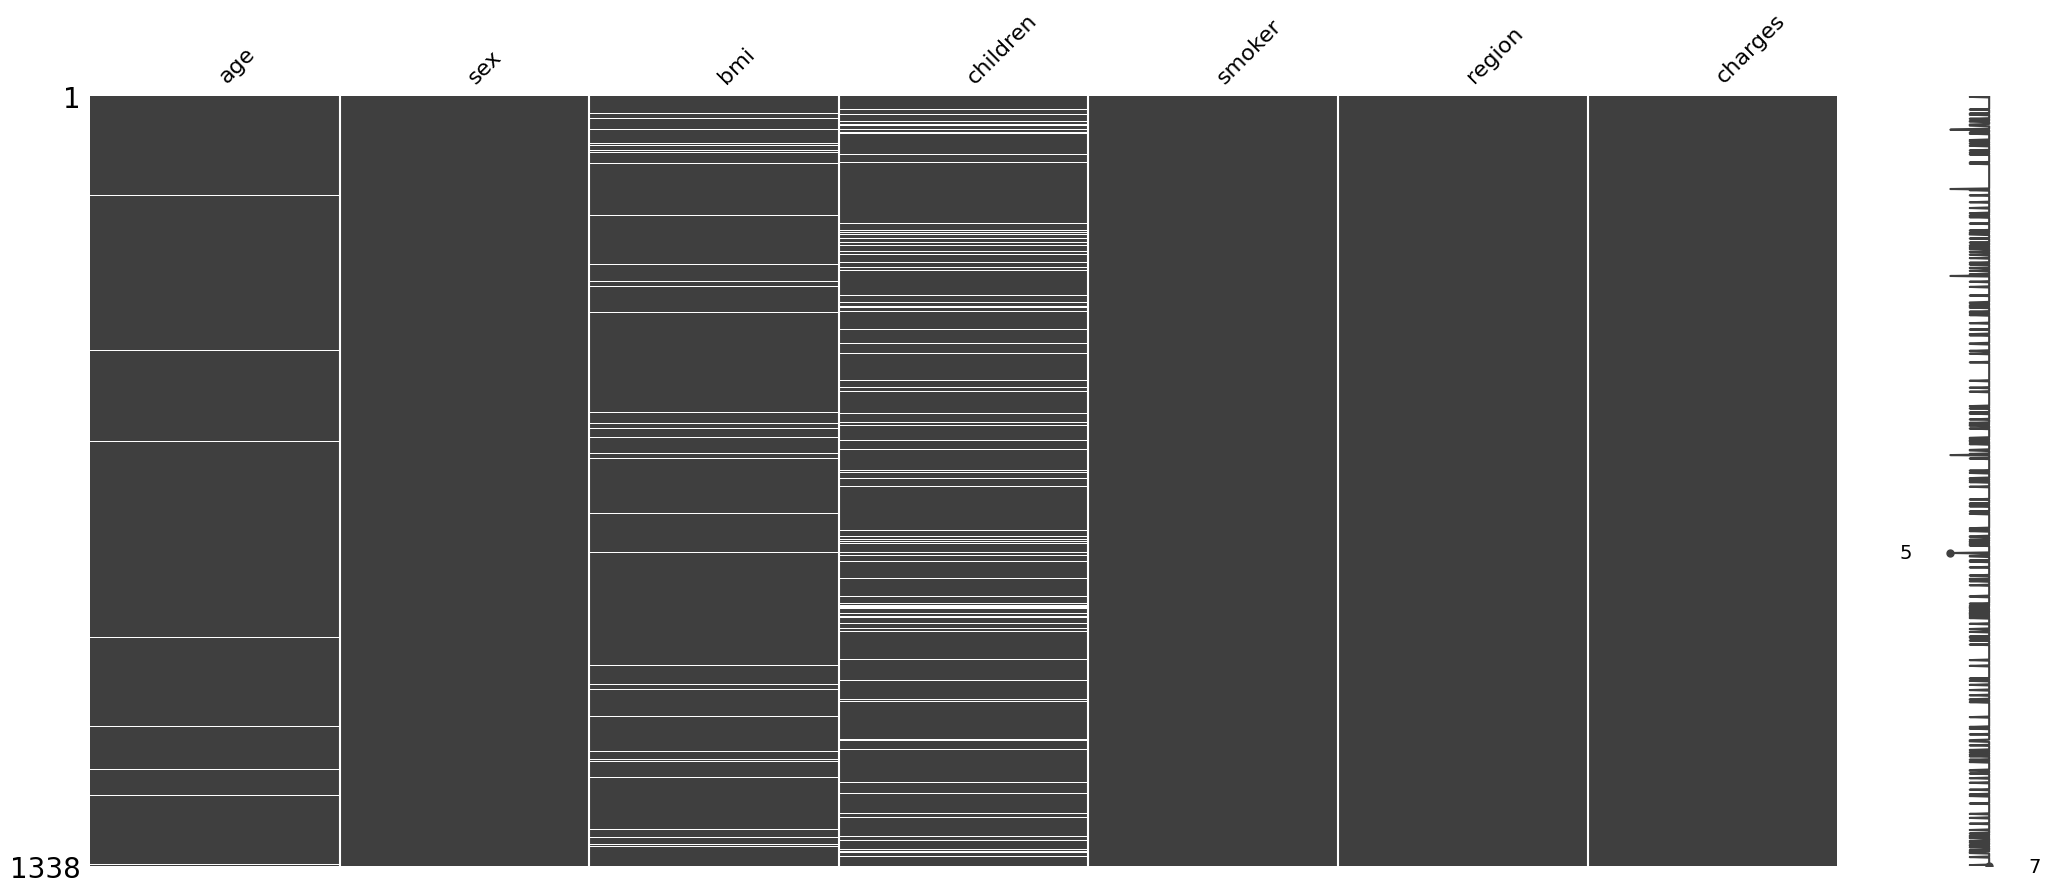

In [ ]:
msno.matrix(df)

### Diagnose missing values

#  Question 2: Diagnosing Missing Values with Histograms

In this exercise, you will investigate **missing values** in a dataset and decide whether they are **MCAR, MAR, or MNAR**.  

We will use **histograms** to compare distributions of features with and without missing values.  

---

### **Your Coding Task**

Write a Python function called `diagnose_mv(df, mv_column)` that:

1. **Inputs**:
   - `df`: a pandas DataFrame  
   - `mv_column`: the column that has missing values  

2. **For each feature (column) in the dataset**:
   - Plot a **histogram** of the feature using **all rows** (this includes rows where `mv_column` is missing).  
   - Plot another **histogram** of the same feature, but only using rows where `mv_column` is **not missing**.  
   - Plot a **bar chart** showing the **absolute difference** between the two histograms (bin by bin).  

3. **Arrange the plots**:
   - Left → histogram with all rows  
   - Middle → histogram without rows where `mv_column` is missing  
   - Right → bar chart showing the difference  

---

### **Interpretation Task**

After you run your function and generate the histograms:

- Compare the shapes of the histograms.  
- Decide whether the missingness in your dataset looks like **MCAR, MAR, or MNAR**.  
- Write your conclusion in a **text cell** (5–10 sentences) explaining what you observed.  


##### ** Function

In [ ]:

def diagnose_mv(df, mv_column):



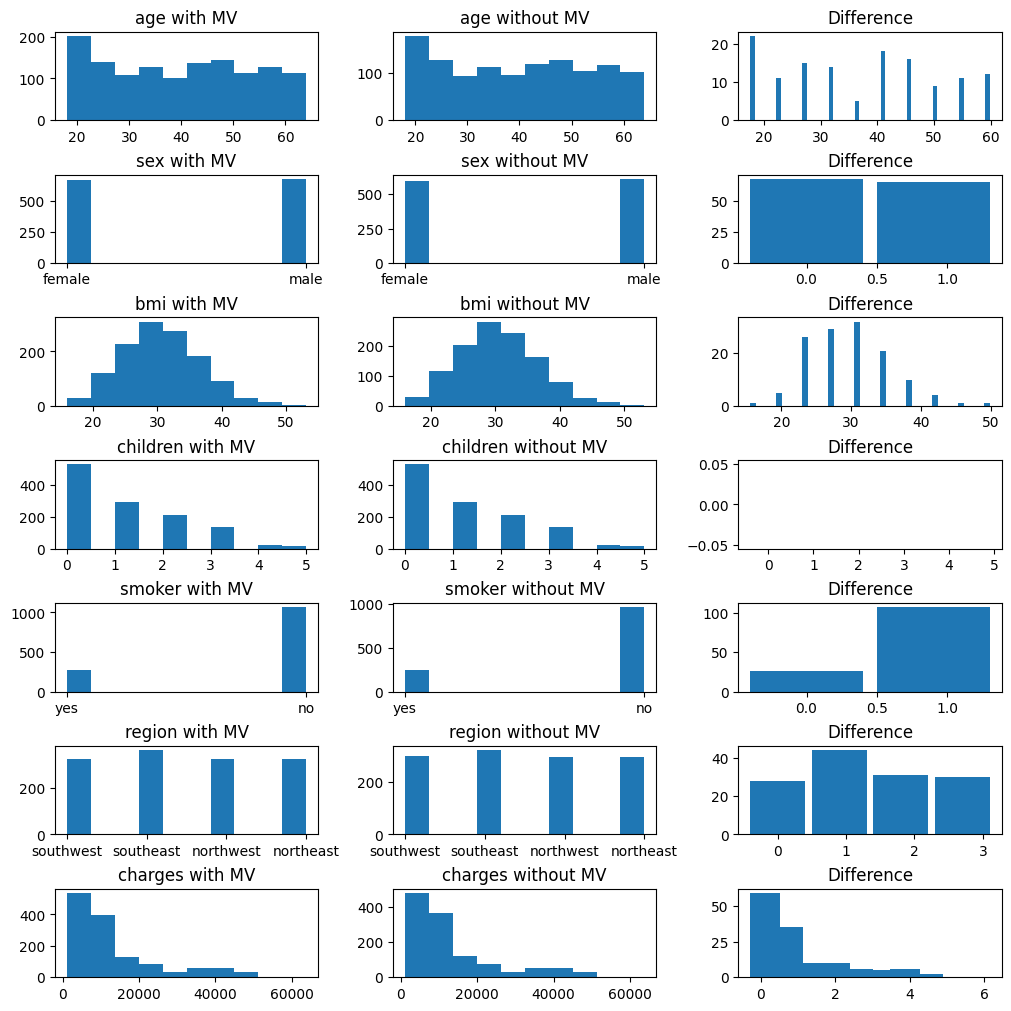

In [ ]:
diagnose_mv(df, 'children')

#### * BMI

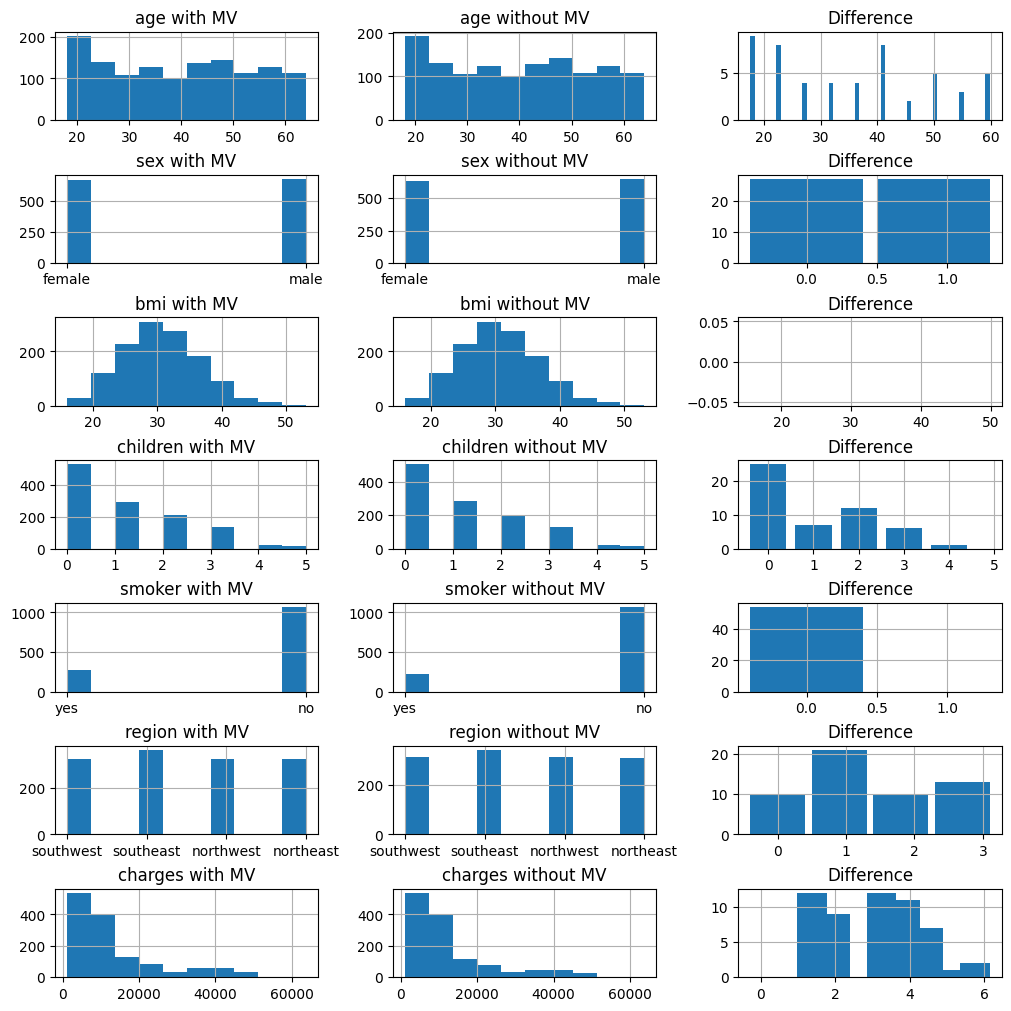

In [ ]:
diagnose_mv(df, 'bmi')

#### * Age

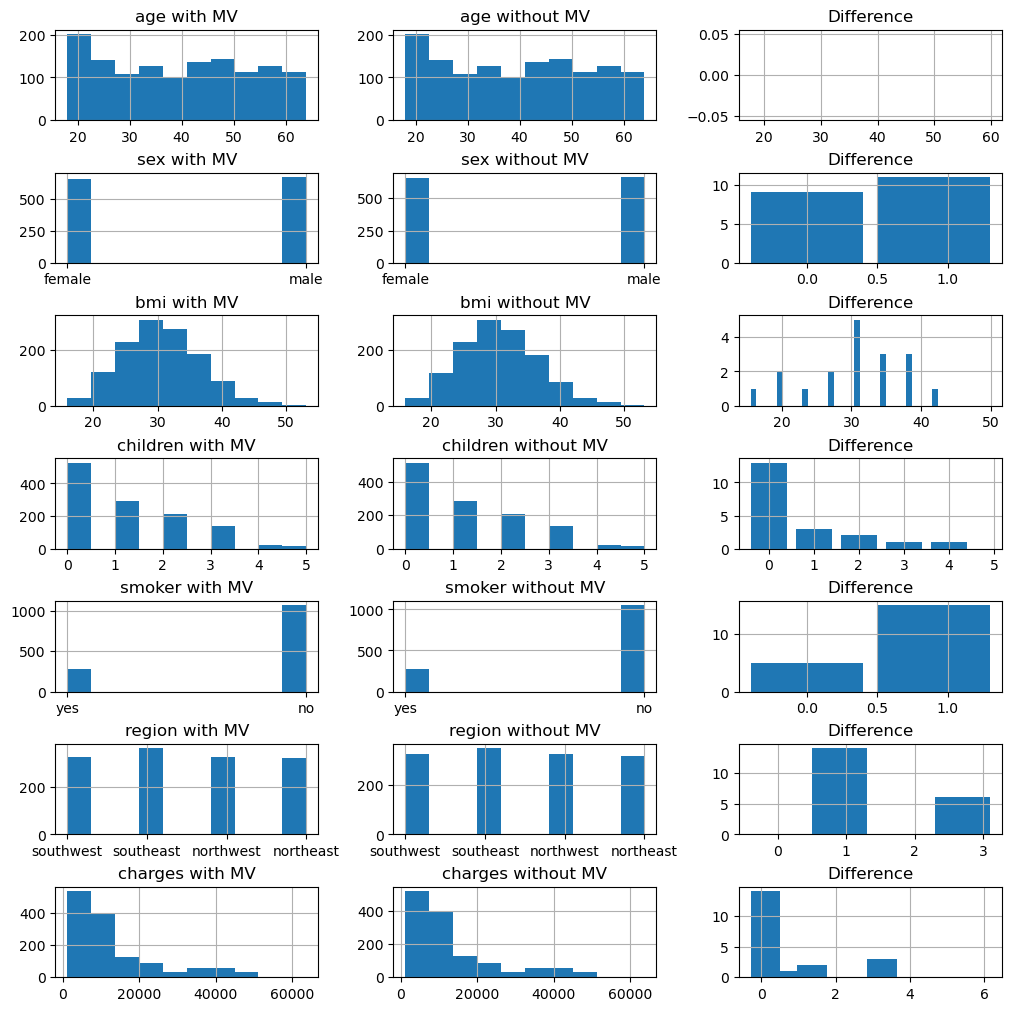

In [ ]:
diagnose_mv(df, 'age')

**Observation 2**

# 🔸 Handling Missing Values

Once we identify the type of missing data, we need to choose the right strategy to handle it.  
Different approaches are suitable for **MCAR, MAR, and MNAR**.  

---

## Handling Strategies

| **Type** | **Best Handling Methods** | **Notes** |
|----------|---------------------------|-----------|
| **MCAR** (Missing Completely At Random) | - Drop rows with missing values (safe, no bias) <br> - Drop entire column (if too many missing values) <br> - Simple imputation (mean, median, mode) | Since missingness is random, any method works without bias. |
| **MAR** (Missing At Random) | - Use **imputation based on other features** (regression imputation, KNN imputer, multiple imputation) <br> - Group-wise imputation (e.g., fill income by median per age group) | Missingness is linked to other variables, so we must use them to estimate. |
| **MNAR** (Missing Not At Random) | - Add a “missing” indicator/flag column <br> - Use **domain knowledge** or expert rules to fill values <br> - Sensitivity analysis <br> - Sometimes drop rows (but may bias results) | Hardest to handle because the missingness depends on the missing value itself. Often needs external info or careful modeling. |

---

 **Summary:**  
- **MCAR** → easiest, can drop or use simple fill (mean/median/mode).  
- **MAR** → medium, use relationships with other features to impute.  
- **MNAR** → hardest, may need domain knowledge, missing flags, or more data.  


## Question 3: Handling Different Types of Missing Values

Now that you know how to identify MCAR, MAR, and MNAR, let’s practice handling them in a dataset.  

### **Your Task**

For each of the following cases, apply the correct method to handle missing values:  

1. **MCAR**  
   - Missing values are random.  
   - Replace missing values with the **mode** (most frequent value).  

2. **MAR**  
   - Missing values depend on another variable.  
   - Use **conditional imputation**, such as replacing missing values with the **median** (or mean) within subgroups.  

3. **MNAR**  
   - Missing values depend on the value itself.  
   - Handle them by **dropping rows** with missing values, or by creating a **“missing” indicator column**.  

---

After handling the missing values:  
- Use `msno.matrix(df)` (or another visualization) to verify that there are no missing values left.  
- In a **text cell**, explain in 2–3 sentences why you chose:  
  - Mode for MCAR  
  - Median (conditional) for MAR  
  - Row deletion (or indicator) for MNAR  


#### * Children

#### * BMI

#### * Age

#  Encoding and Attribute Construction

Machine learning models usually need **numeric input**, but real-world datasets often contain **categorical data** (like colors, countries, or product types).  
To use this data in models, we apply **encoding techniques** that convert categories into numbers.  
We can also create **new features** from existing ones — this is called **attribute construction** (or feature engineering).  

---

### **Types of Encoding**

1. **Label Encoding**
- Converts categories into numbers (integers).  
- Best for **ordinal data** (where order matters, like Small < Medium < Large).  
-  Not good for nominal data because numbers may wrongly imply ranking.  

2. **One-Hot Encoding**
- Creates a separate binary column for each category.  
- Best for **nominal data** (where order does not matter, like Red, Blue, Green).  
-  Can increase dataset size if there are many categories.  

3. **Attribute Construction (Feature Engineering)**
- Creates new features (categorical or numerical) from existing ones.  
- Useful for adding more **meaningful information** to the dataset.  
- Example: From a date, we can extract **Day, Hour, Is_Weekend**.  

---

###  Summary Table

| **Method**              | **What it Does**                                  | **Example (Input)**          | **Example (Output)**                                             | **When to Use** |
|--------------------------|---------------------------------------------------|-------------------------------|------------------------------------------------------------------|-----------------|
| **Label Encoding**       | Assigns each category a number.                   | Size = {Small, Medium, Large} | Small=0, Medium=1, Large=2                                       | For **ordinal** data (ordered categories). |
| **One-Hot Encoding**     | Creates a binary column for each category.        | Color = {Red, Green, Blue}    | Red → [1,0,0], Green → [0,1,0], Blue → [0,0,1]                  | For **nominal** data (unordered categories). |
| **Attribute Construction** | Creates new categorical or numerical features from existing ones. | Date = `2023-09-13 14:35:00` | New Features → `Day = Wednesday`, `Hour = 14`, `Is_Weekend = No` | When we want to extract **useful patterns** from existing attributes. |

---

 In short:  
- **Label Encoding** = numbers for ordered categories.  
- **One-Hot Encoding** = binary columns for unordered categories.  
- **Attribute Construction** = build new features from existing ones.  


# **Question 4: Choosing the Right Encoding for Categorical Features**

In this exercise, you will decide which encoding method is most suitable for each categorical variable in the dataset, then apply it using scikit-learn.  

---

### **Your Task**

1. Inspect the dataset and identify the categorical features.  
   - Example: `sex`, `smoker`, `region`  

2. For each categorical feature:  
   - Suggest which type of encoding is **most appropriate** (Label Encoding, One-Hot Encoding, etc.).  
   - Explain why you chose that method.  

3. Apply the encoding using different classes from **`sklearn.preprocessing`**, such as:  
   - `LabelEncoder`  
   - `OneHotEncoder`  
   - `OrdinalEncoder`  

4. Compare your encoded dataset with the original:  
   - Which features are binary categorical?  
   - Which features are nominal categorical?  
   - Which features (if any) could be considered ordinal?  

5. In a **text cell**, write your explanation in 2–3 sentences for each feature:  
   - Why you chose that encoding method.  
   - Why another method might not be appropriate.  


### Scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


# 🔸 Normalization vs Standardization

When working with datasets, features (columns) often have different scales.  
For example:  
- **Age** might range from 18 to 80  
- **Income** might range from 10,000 to 200,000  

Some machine learning models (like KNN, SVM, Neural Networks) are sensitive to these differences in scale.  
To fix this, we use **feature scaling** methods like **Normalization** and **Standardization**.  

---

##  Normalization (Min-Max Scaling)

- Rescales values to a fixed range, usually **[0, 1]**.  
- Formula:  

\[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\]

- Example: If Age ranges from 18–80, then:  
  - 18 → 0.0  
  - 80 → 1.0  
  - 49 → ~0.5  

✔ Useful when features have very different ranges and we want everything between 0 and 1.  

---

##  Standardization (Z-Score Scaling)

- Rescales values so they have **mean = 0** and **standard deviation = 1**.  
- Formula:  

\[
x' = \frac{x - \mu}{\sigma}
\]

(where μ = mean, σ = standard deviation)  

- Example: If Age has mean = 40 and std = 10, then:  
  - Age 50 → (50-40)/10 = 1.0  
  - Age 30 → (30-40)/10 = -1.0  

✔ Useful for algorithms that assume data is normally distributed (e.g., Logistic Regression, SVM, PCA).  


# Question 5

1. Apply **Normalization** to your dataset using either a custom function or `MinMaxScaler` from `sklearn.preprocessing`.  
2. Apply **Standardization** to the same dataset using either a custom function or `StandardScaler`.  
3. Compare the results:  
   - Which features are now between 0 and 1?  
   - Which features now have mean ~0 and std ~1?  
4. In a **text cell**, explain in 2–3 sentences:  
   - When would you use **Normalization**?  
   - When would you use **Standardization**?  
